In [2]:
import camb
from camb import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams["figure.dpi"] = 300
mpl.rc('axes', titlesize=12, labelsize=12)
mpl.rc('legend', fontsize=16)

In [3]:
params = model.CAMBparams()
params = camb.set_params(
    H0=68.22,
    omch2=0.1179,
    ombh2=0.02256,
    tau=0.0632,
    ns=0.9743,
    As=2.13e-9,
    w = -1,
    wa=0,
    beta_DE=0,
    halofit_version='mead',
)

# Plotting power spectra for log parameterisation&positive $w_\beta$

- this combination results in large positive $w(z)$ in the past which appears to break the code due to physical issues in the reionization part
- same issue for negative and small positive $\beta$
- potentially the reason why CPL prefers phantom crossing could be related to how early physics cannot be computed with early positive $w(z)$
    - and so negative $w_a$ has to be preferred but as it is linear, the equation of state has to go down and cross the phantom crossing

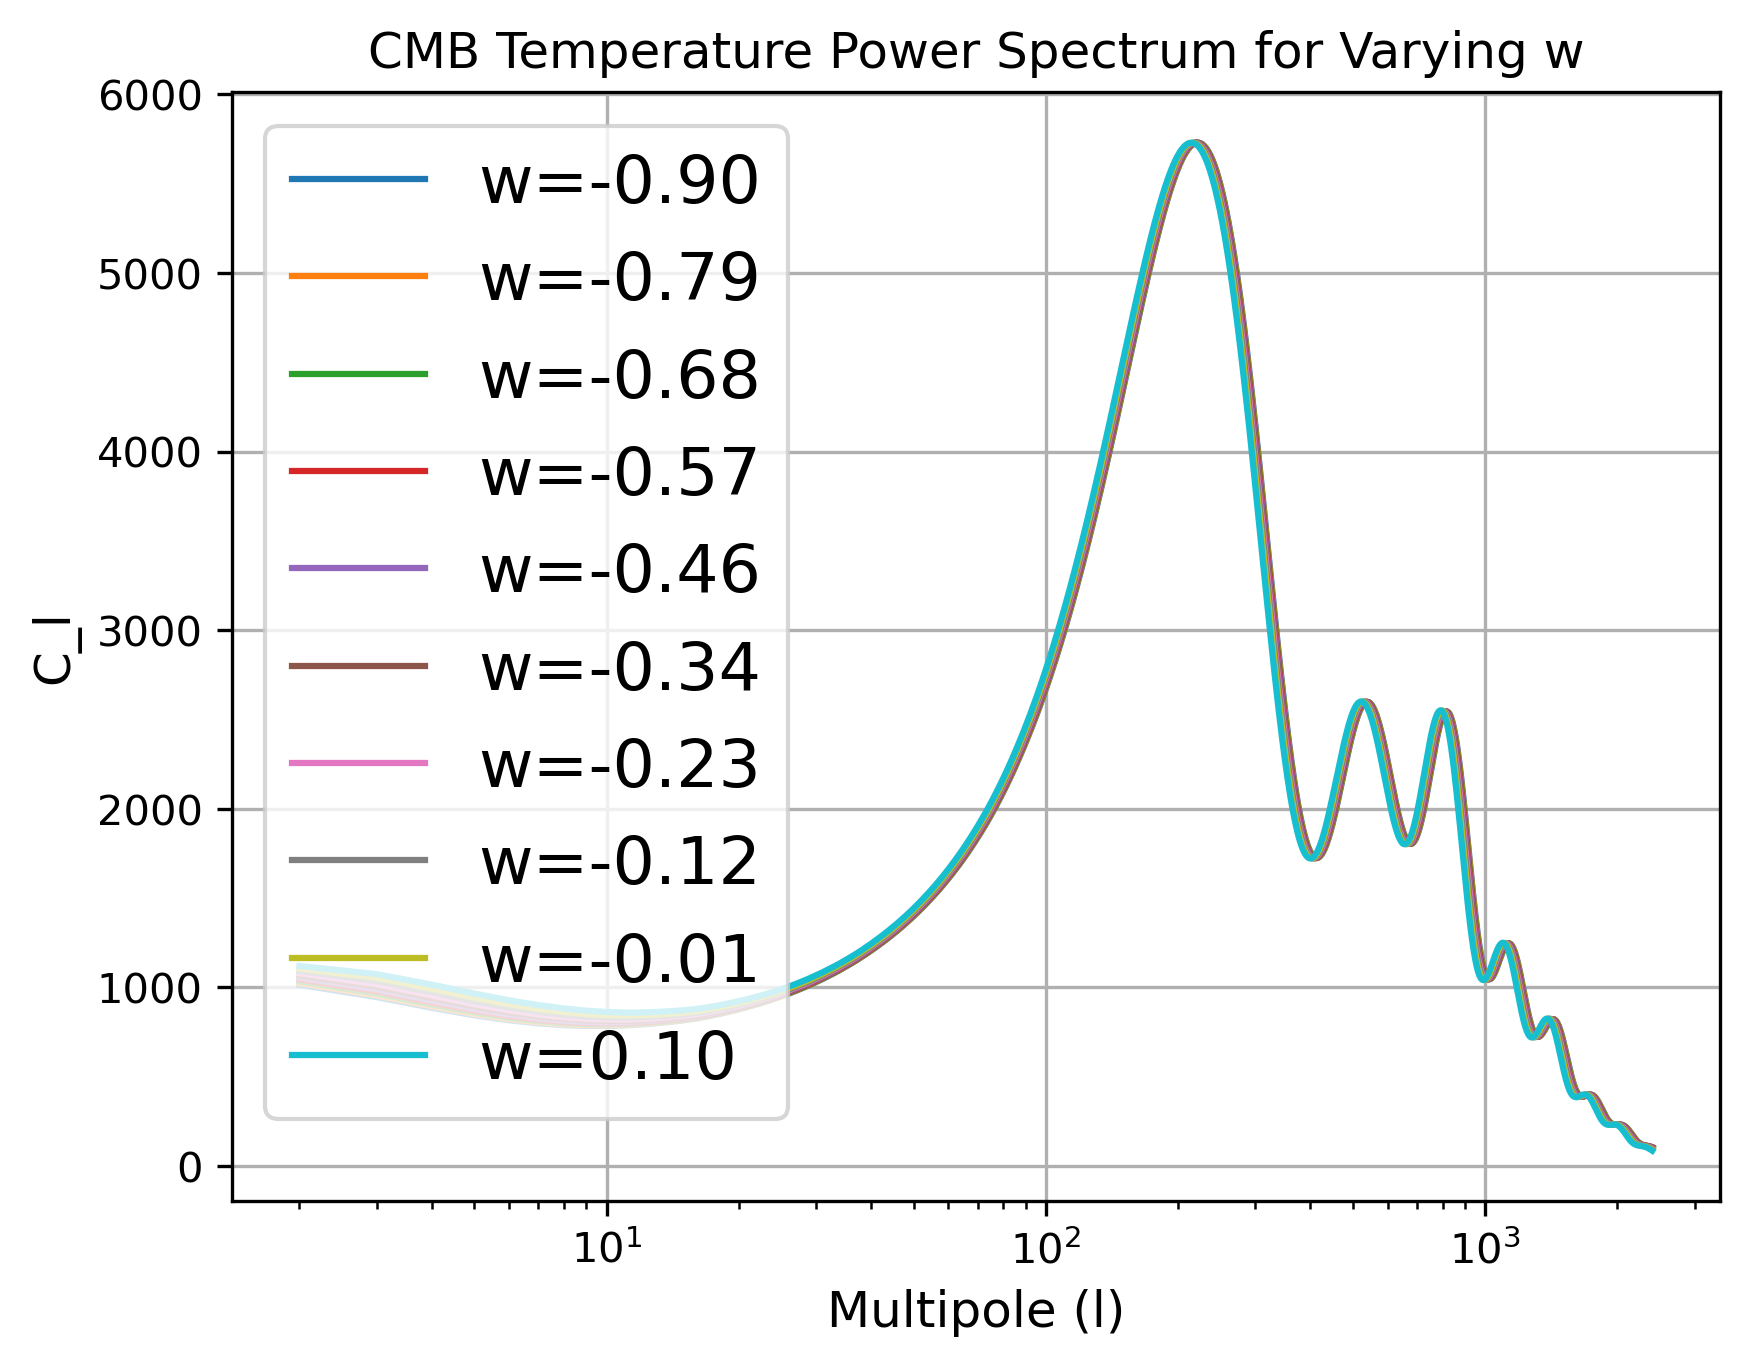

In [4]:
wa = np.linspace(-0.9, 0.1, 10)
for w in wa:
    params.set_dark_energy(w=-0.8, wa=w, beta_DE=0.1, dark_energy_model='ppf')
    cl = camb.get_results(params).get_lensed_scalar_cls(CMB_unit="muK")
    plt.plot(np.arange(cl[:,0].shape[0])[2:], cl[:,0][2:], label=f"w={w:.2f}")

plt.xlabel("Multipole (l)")
plt.ylabel("C_l")
plt.legend()
plt.title("CMB Temperature Power Spectrum for Varying w")
plt.xscale('log')
plt.grid()
plt.show()

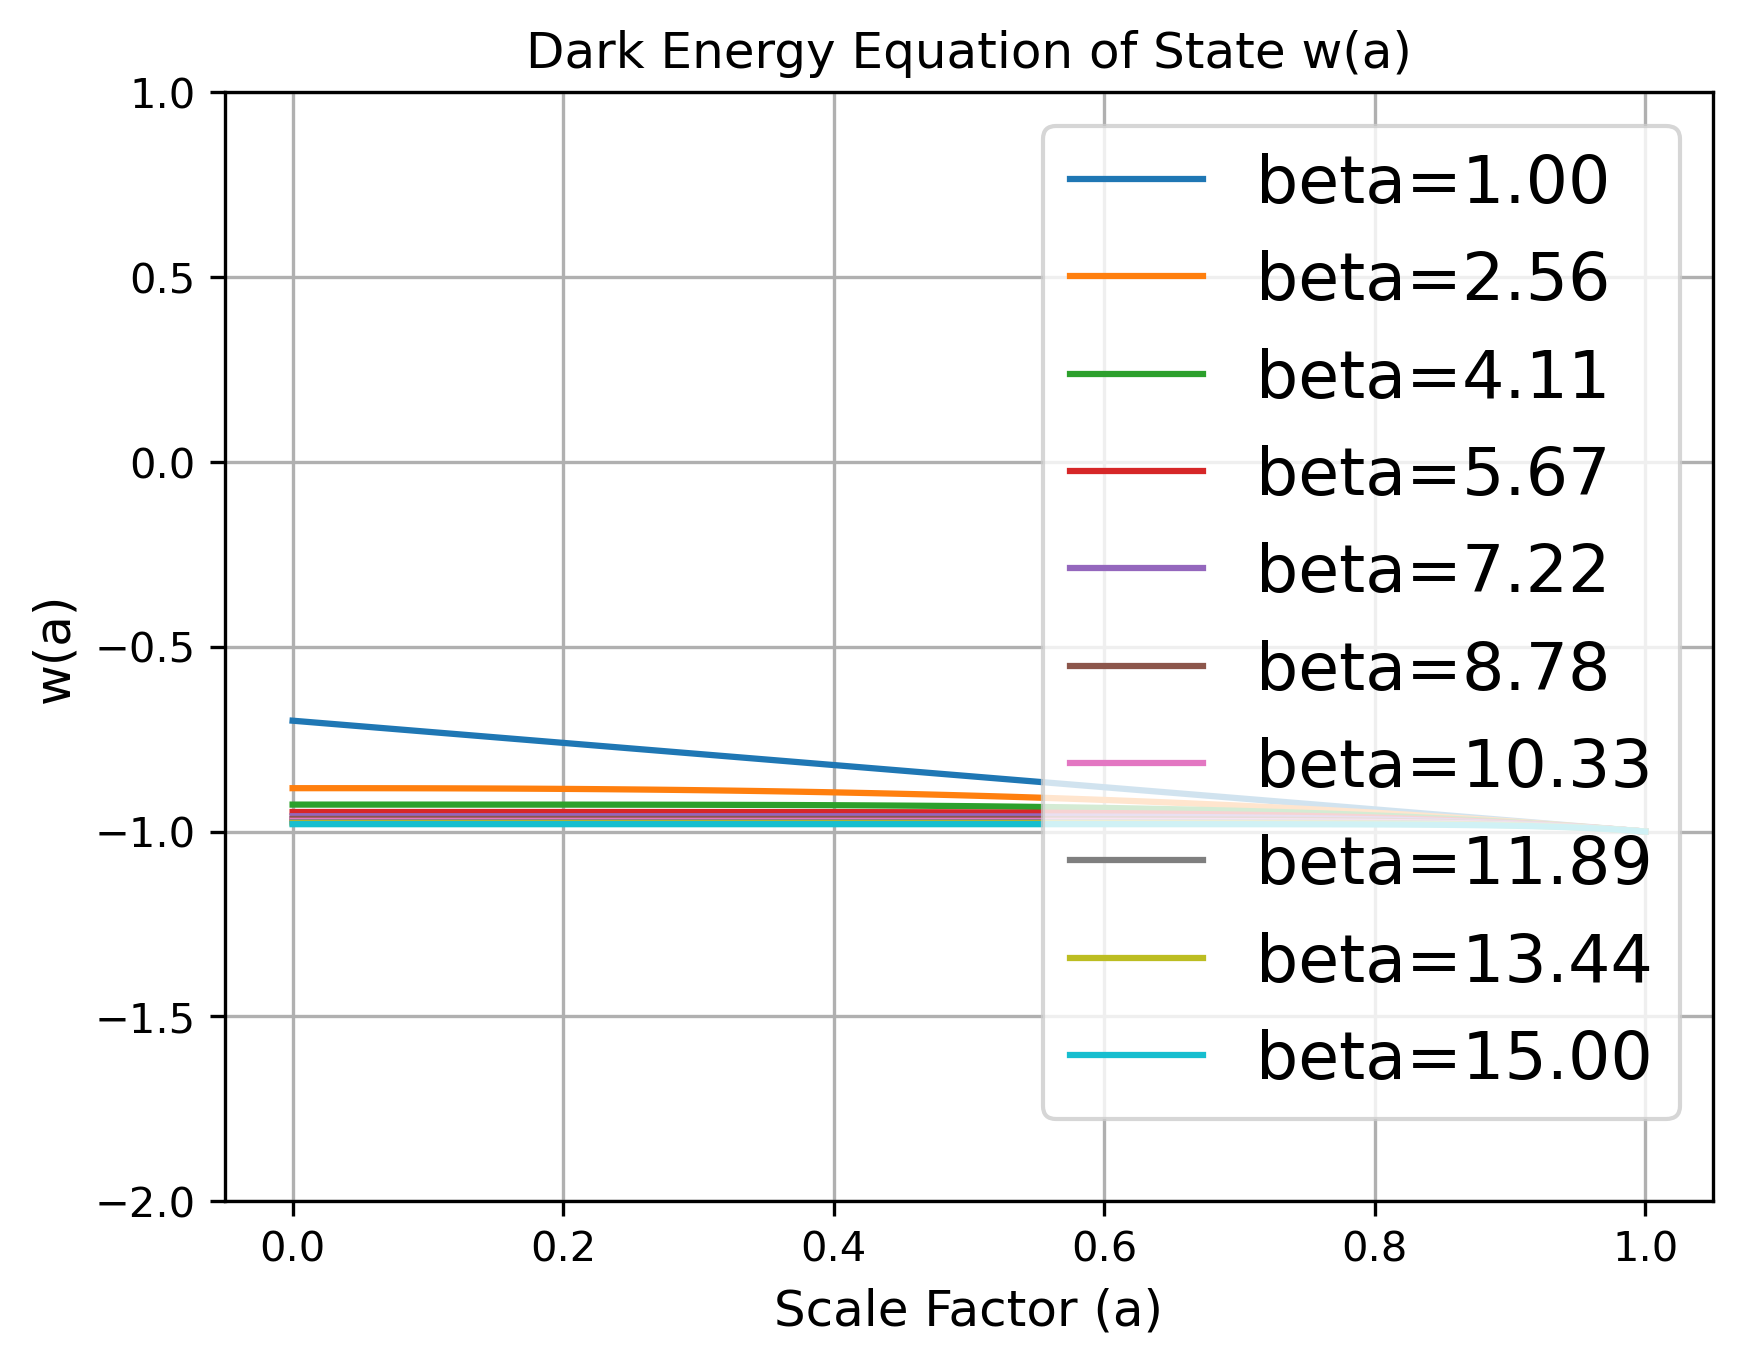

In [20]:
beta = np.linspace(1, 15,10)
def w(a, beta):
    return -1-0.3*(a**beta-1)/beta

a = np.linspace(0, 1, 100)
for b in beta:
    plt.plot(a, w(a,b), label=f"beta={b:.2f}")
plt.ylim(-2,1)
plt.xlabel("Scale Factor (a)")
plt.ylabel("w(a)")
plt.title("Dark Energy Equation of State w(a)")
plt.grid()
plt.legend()
plt.show()